In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load dataset
file_path = "Dataset Bakery for MC - dataset.csv"
df = pd.read_csv(file_path)
df.head()

,ticket_number,date,time,article,Quantity,unit_price_euro
0,150045,2021-01-02,9:32,TRADITIONAL BAGUETTE,3,1.20
1,150046,2021-01-02,9:37,TRADITIONAL BAGUETTE,6,1.20
2,150049,2021-01-02,9:40,CROISSANT,2,1.10
3,150049,2021-01-02,9:40,TRADITIONAL BAGUETTE,1,1.20
4,150051,2021-01-02,9:46,PAIN,1,1.15


In [3]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

In [4]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'])

# Add day of the week column
df['day_of_week'] = df['date'].dt.day_name()

# Add hour column
df['hour'] = pd.to_datetime(df['time'], format='%H:%M').dt.hour

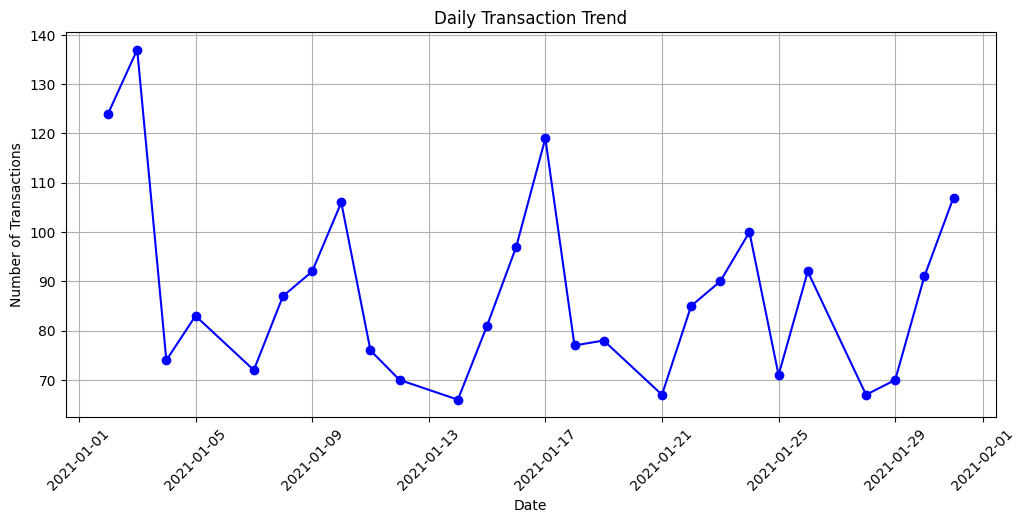

In [5]:
# Analysis 1: Daily transaction trend
daily_sales = df.groupby('date')['ticket_number'].nunique()
plt.figure(figsize=(12, 5))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.title("Daily Transaction Trend")
plt.xticks(rotation=45)
plt.grid()
plt.show()


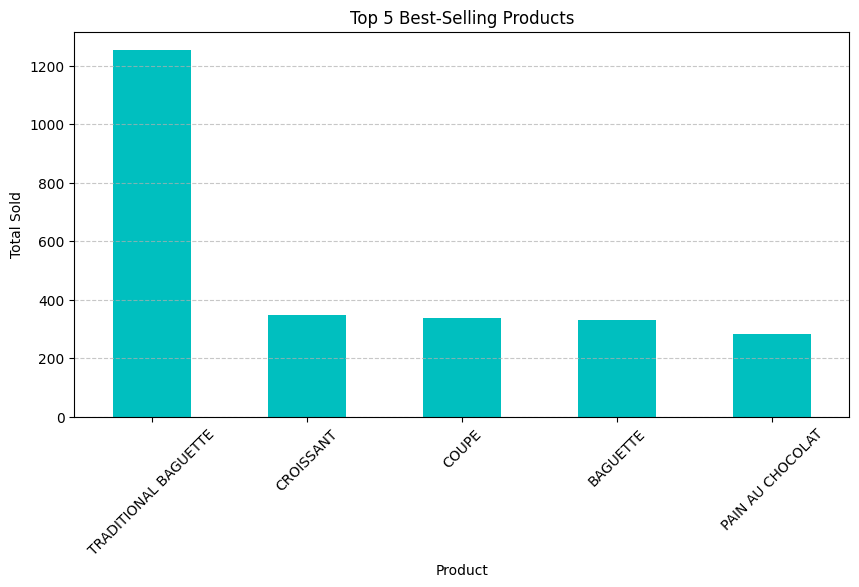

In [6]:
# Analysis 2: Top 5 best-selling products
top_products = df.groupby('article')['Quantity'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10, 5))
top_products.plot(kind='bar', color='c')
plt.xlabel("Product")
plt.ylabel("Total Sold")
plt.title("Top 5 Best-Selling Products")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

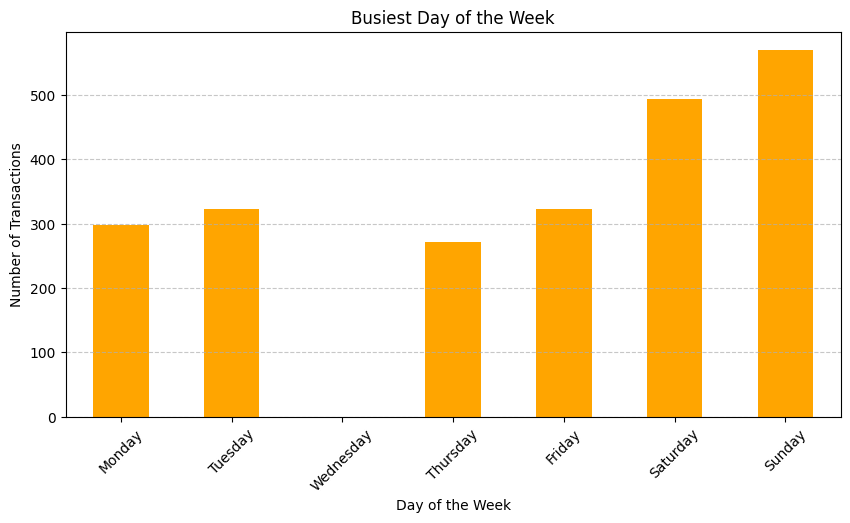

In [7]:
# Analysis 3: Busiest day of the week
day_sales = df.groupby('day_of_week')['ticket_number'].nunique().sort_values()
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_sales = day_sales.reindex(order)
plt.figure(figsize=(10, 5))
day_sales.plot(kind='bar', color='orange')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Transactions")
plt.title("Busiest Day of the Week")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

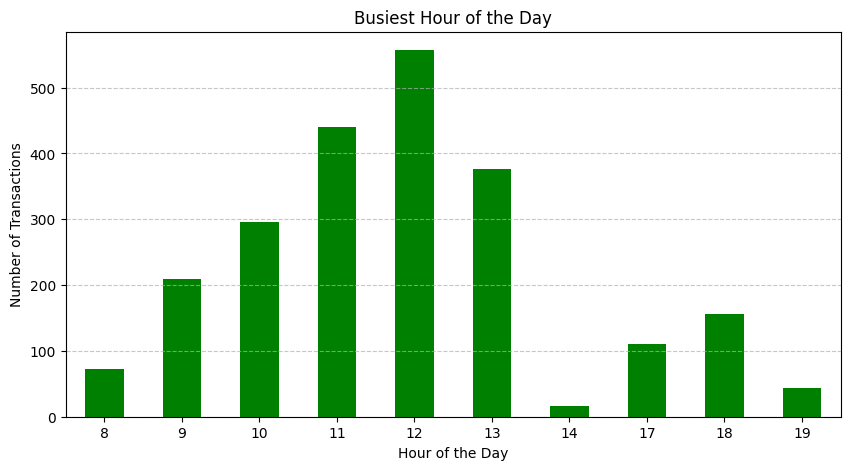

In [8]:
# Analysis 4: Busiest hour of the day
hourly_sales = df.groupby('hour')['ticket_number'].nunique()
plt.figure(figsize=(10, 5))
hourly_sales.plot(kind='bar', color='green')
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Transactions")
plt.title("Busiest Hour of the Day")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

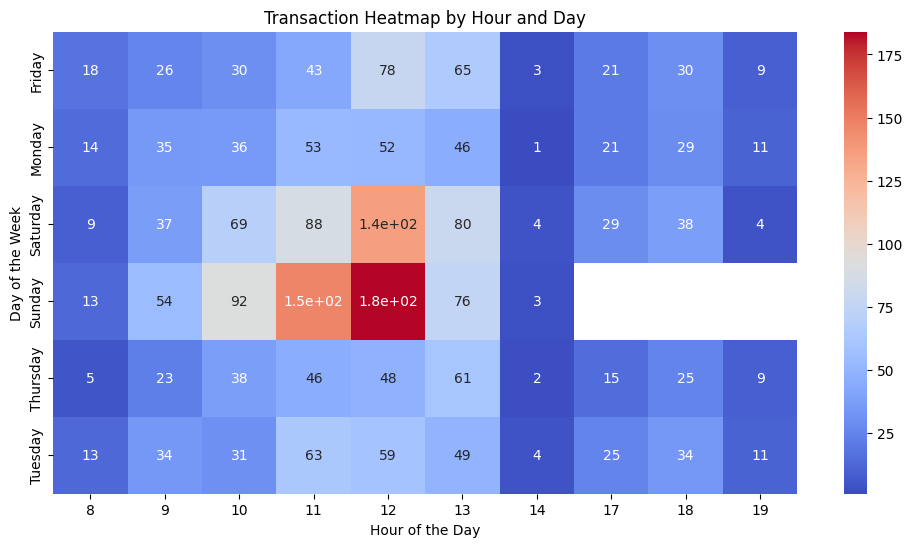

In [9]:
# Analysis 5: Heatmap of transactions by hour and day
heatmap_data = df.groupby(['day_of_week', 'hour'])['ticket_number'].nunique().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2g")
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Transaction Heatmap by Hour and Day")
plt.show()

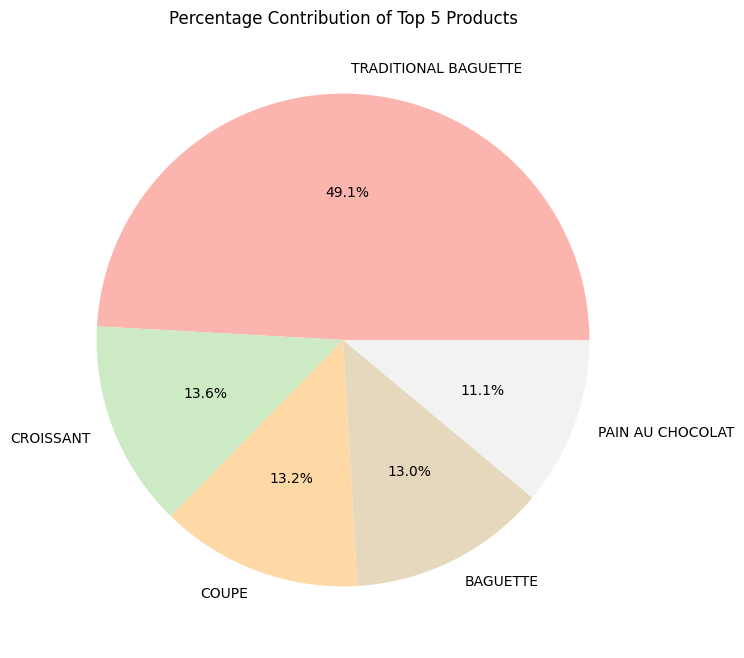

In [10]:
# Analysis 6: Pie chart of top 5 products
top_products.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), cmap='Pastel1')
plt.ylabel("")
plt.title("Percentage Contribution of Top 5 Products")
plt.show()


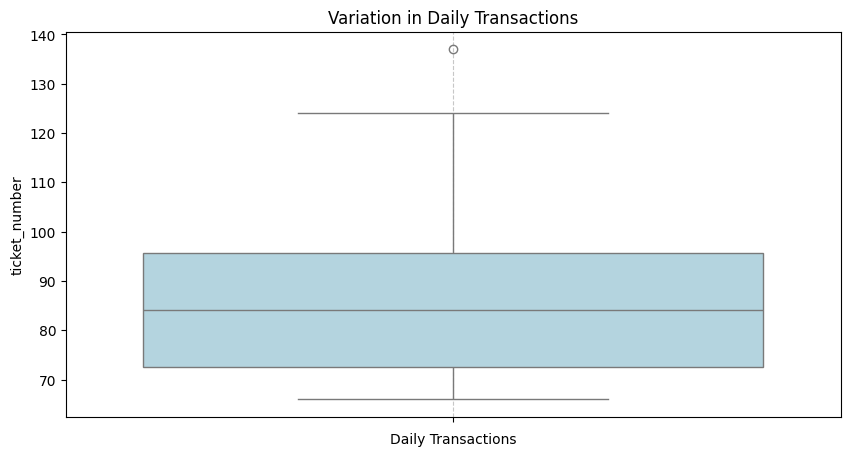

In [11]:
# Analysis 7: Boxplot for daily transaction variation
plt.figure(figsize=(10, 5))
sns.boxplot(data=daily_sales, color='lightblue')
plt.xlabel("Daily Transactions")
plt.title("Variation in Daily Transactions")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

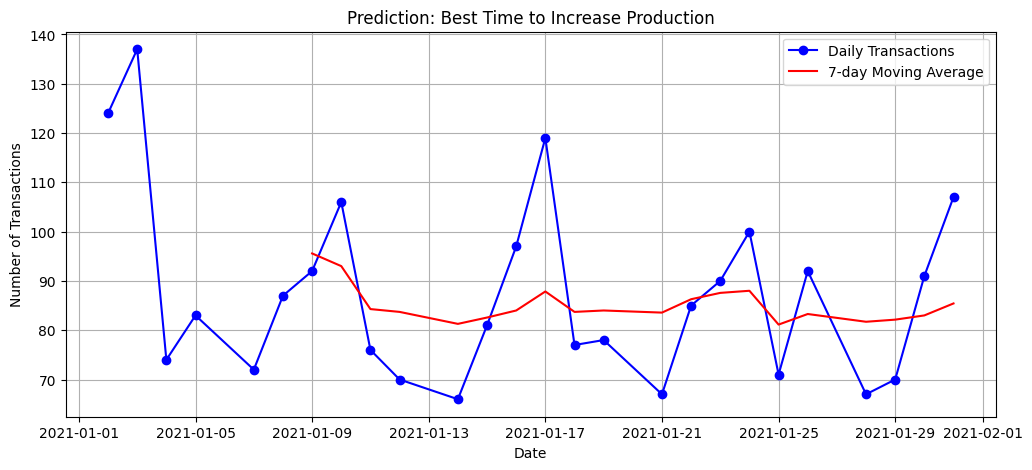

In [12]:
# Analysis 8: Predicting best time to increase production
moving_avg = daily_sales.rolling(window=7).mean()
plt.figure(figsize=(12, 5))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-', color='b', label='Daily Transactions')
plt.plot(moving_avg.index, moving_avg.values, linestyle='-', color='r', label='7-day Moving Average')
plt.xlabel("Date")
plt.ylabel("Number of Transactions")
plt.title("Prediction: Best Time to Increase Production")
plt.legend()
plt.grid()
plt.show()

In [13]:
# Identifying peak production hours
peak_hours = hourly_sales[hourly_sales > hourly_sales.mean()].index.tolist()
print(f"Recommended hours to increase production: {peak_hours}")

Recommended hours to increase production: [10, 11, 12, 13]
